## Cross-Sell Prediction
Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

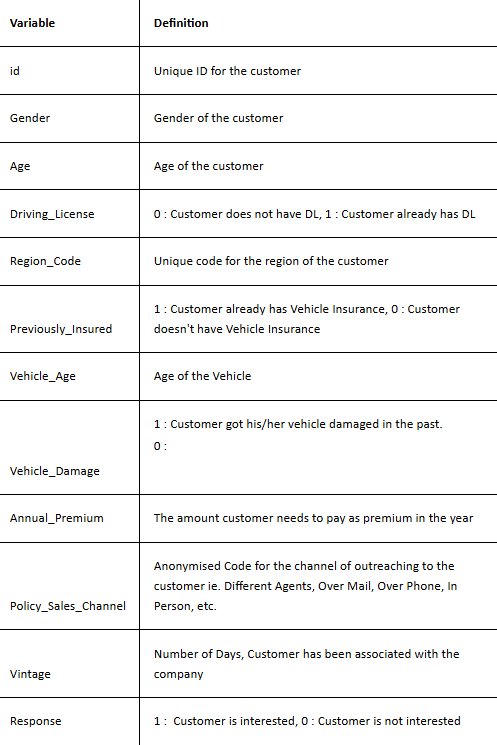

the main goal is to predict wether the customer is showing intrest to take policy or not 

# import required libraries 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# load the data into the notebook

In [9]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('Submission.csv')

In [10]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
# drop the the id column
df.drop(['id'], axis=1, inplace=True)

In [12]:
df.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [13]:
import plotly.express as px

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [15]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

 the data does not contain null values

In [17]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# EXPLORATORY DATA ANALYSIS

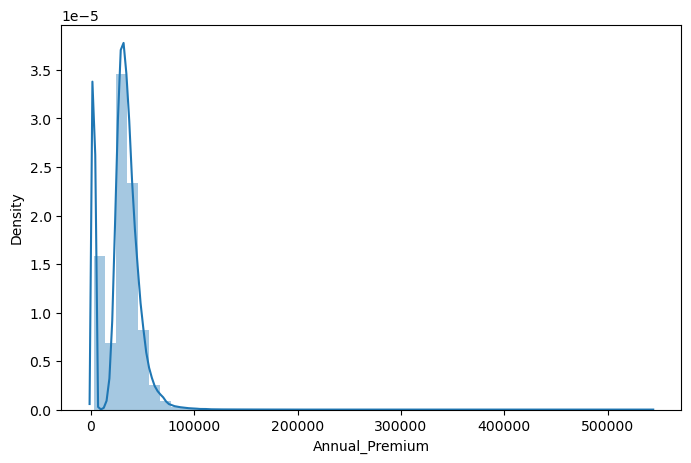

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(df['Annual_Premium'])
plt.show()

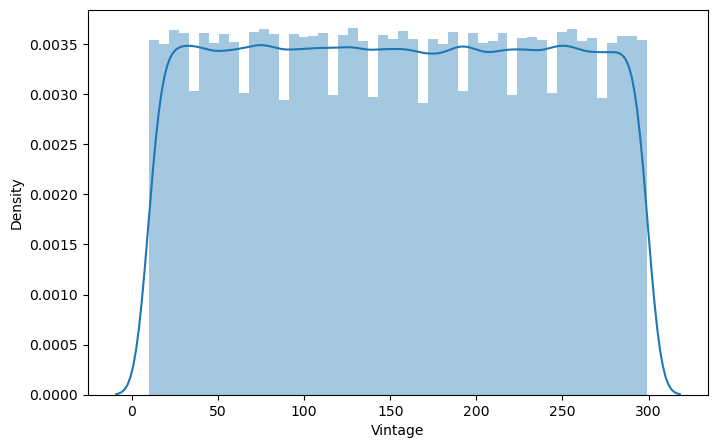

In [20]:
plt.figure(figsize=(8,5))
sns.distplot(df['Vintage'])
plt.show()

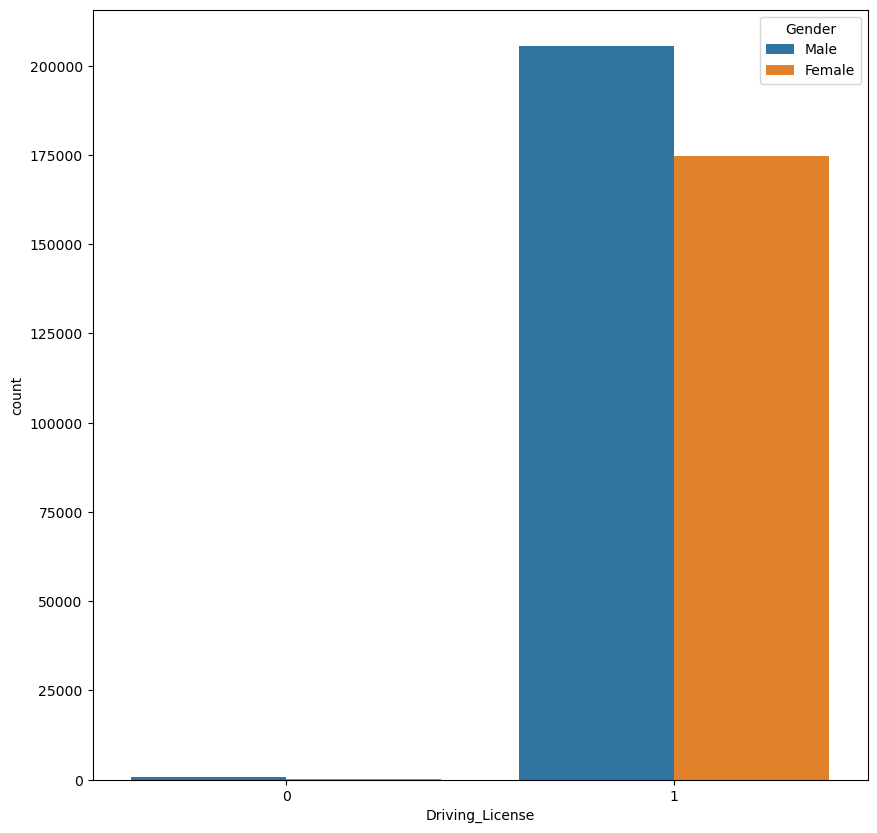

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="Driving_License", hue='Gender')
plt.show()

In [22]:
df['Driving_License'].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

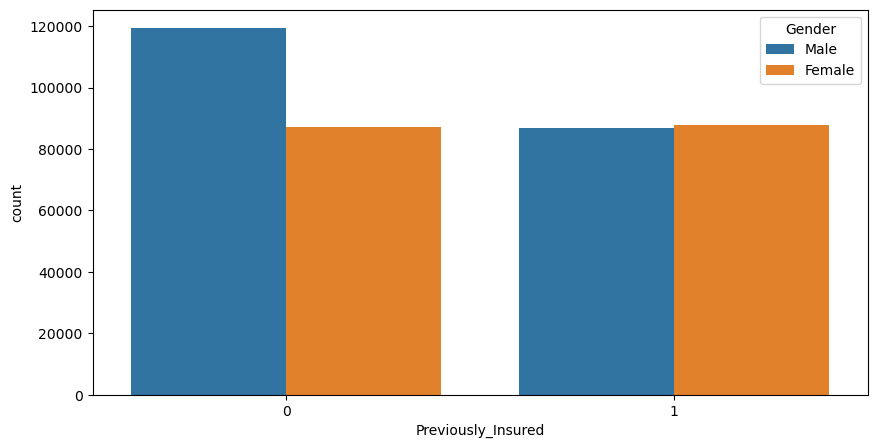

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Previously_Insured", hue='Gender')
plt.show()

the chart provides a clear visualization of how the "Previously_Insured" status is distributed across genders, highlighting that most individuals in the dataset were not previously insured, and this trend is consistent across both males and females.

In [25]:
df['Previously_Insured'].value_counts()

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

there are nearly 206481 customers are not prviously_insured and 174628 customers are previously_insured 

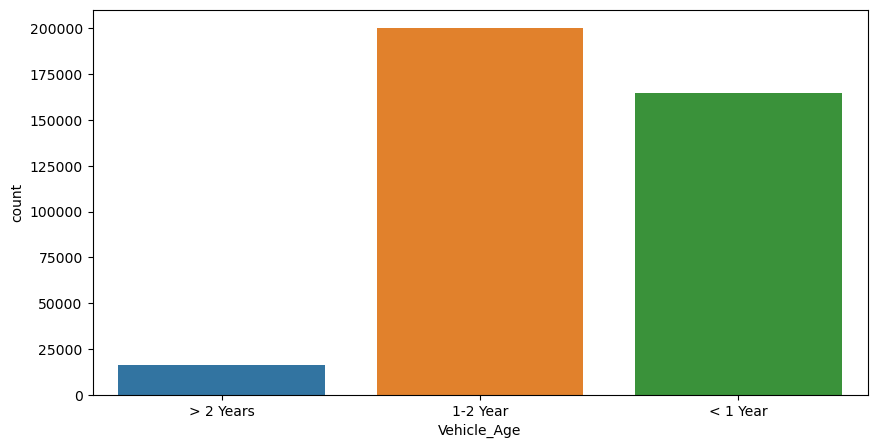

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Vehicle_Age")
plt.show()

The graph indicates that the majority of vehicles in the dataset are older than 2 years.

There is a noticeable decrease in the number of vehicles as the age category decreases, with the fewest vehicles being less than 1 year ol

the graph provides insight into the age distribution of vehicles in the dataset, highlighting that older vehicles (> 2 years) are the most common, followed by vehicles that are 1-2 years old, and the least common are vehicles that are less than 1 year old. This information could be useful for understanding market trends, vehicle maintenance needs, or insurance considerations.d.

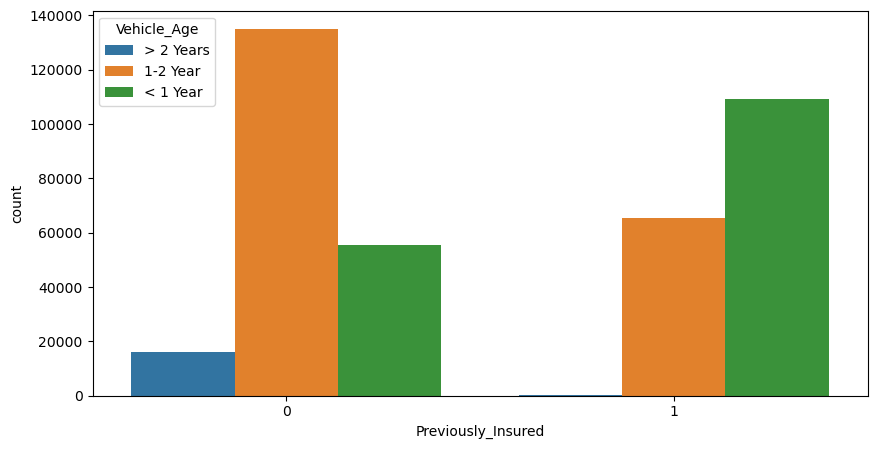

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Previously_Insured", hue='Vehicle_Age')
plt.show()

* The graph shows that a large majority of individuals were not previously insured ("Previously_Insured" = 0), and this trend is consistent across all vehicle age categories.
* 
Among those who were not previously insured, vehicles that are "> 2 Years" old are the most common, followed by "1-2 Year" and "< 1 Year".* 

The proportion of individuals who were previously insured ("Previously_Insured" = 1) is much smaller, but the distribution across vehicle age categories follows a similar pattern, with older vehicles being more com

* the graph provides insight into the relationship between previous insurance status and vehicle age. It highlights that most individuals, regardless of vehicle age, were not previously insured, with older vehicles being the most common in both insured and uninsured groups. This information could be useful for understanding insurance trends and targeting specific vehicle age groups for insurance policies.mon.

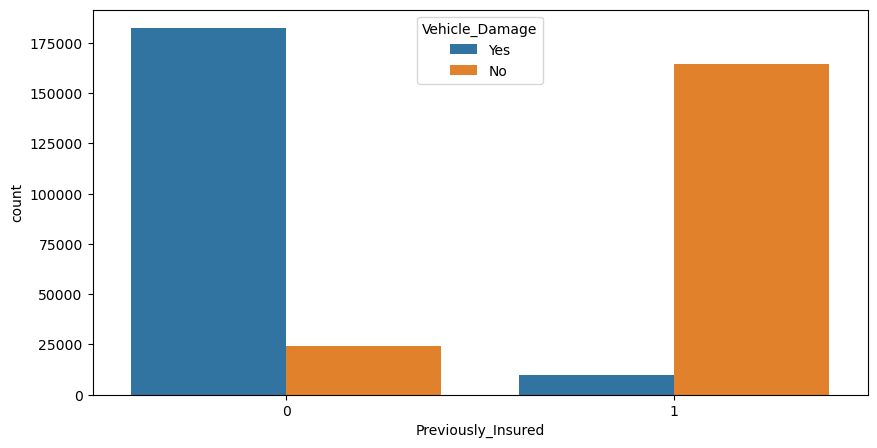

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Previously_Insured", hue='Vehicle_Damage')
plt.show()

* The graph indicates that a large majority of individuals were not previously insured ("Previously_Insured" = 0), and this trend is more pronounced among those with vehicle damage.
* 
Among those who were not previously insured, individuals with vehicle damage are more common than those without damage.* 

The proportion of individuals who were previously insured ("Previously_Insured" = 1) is much smaller, but the presence of vehicle damage still plays a role in the distribution, though less significantly.

In [33]:
df['Region_Code'].value_counts()

Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: count, dtype: int64

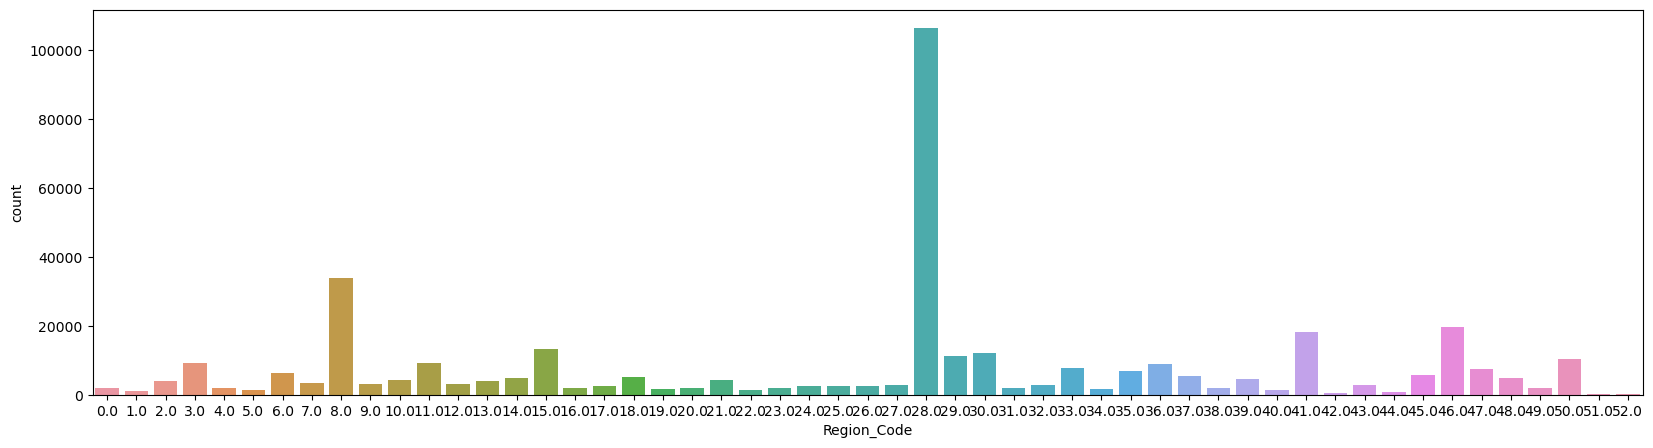

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(data=df,x='Region_Code')
plt.show()

In [35]:
df.drop(['Region_Code'],axis=1,inplace=True)

In [36]:
df.head(2)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,0,1-2 Year,No,33536.0,26.0,183,0


In [37]:
test.drop(['Region_Code'],axis=1,inplace=True)

In [38]:
test.drop(['id'], axis=1, inplace=True)

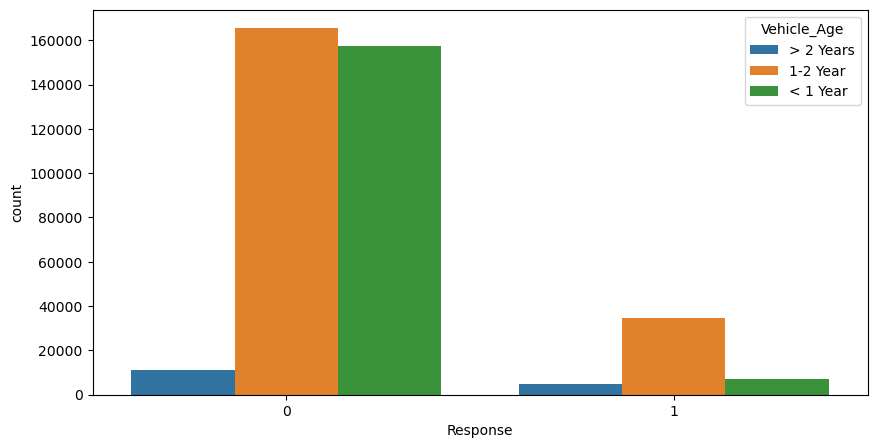

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Response',hue='Vehicle_Age')
plt.show()

* The chart indicates that the response rate (likely indicating a positive outcome, such as purchasing insurance) is low across all vehicle age categories.
* 
Older vehicles ("> 2 Years") are the most common in both response categories, suggesting that they might be a significant segment to target for improving response rate
  s. 

The low response rate for newer vehicles ("< 1 Year") might indicate a need for targeted marketing or incentives to increase engagement with this segment.

In [41]:
df.head(5)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,1,< 1 Year,No,27496.0,152.0,39,0


In [42]:
grouped = df.groupby('Gender')['Response'].mean() * 100
print(grouped)

Gender
Female    10.390241
Male      13.841107
Name: Response, dtype: float64


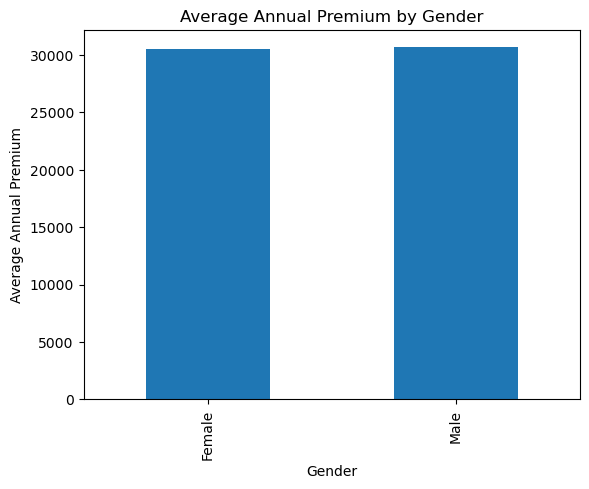

In [43]:
grouped = df.groupby('Gender')['Annual_Premium'].mean()
grouped.plot(kind='bar')
plt.title('Average Annual Premium by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Annual Premium')
plt.show()

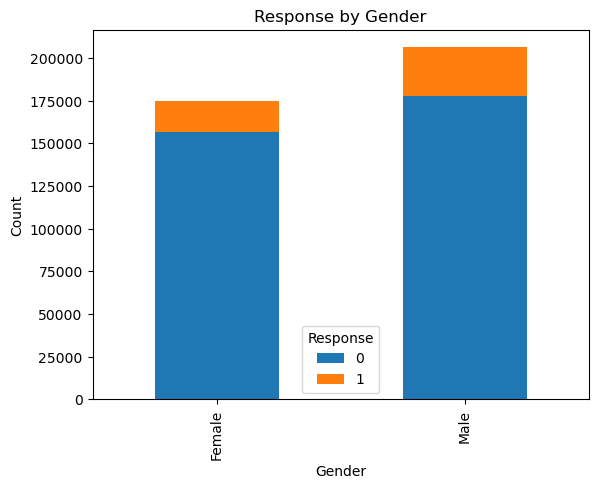

In [44]:
grouped = df.groupby(['Gender', 'Response']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.title('Response by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

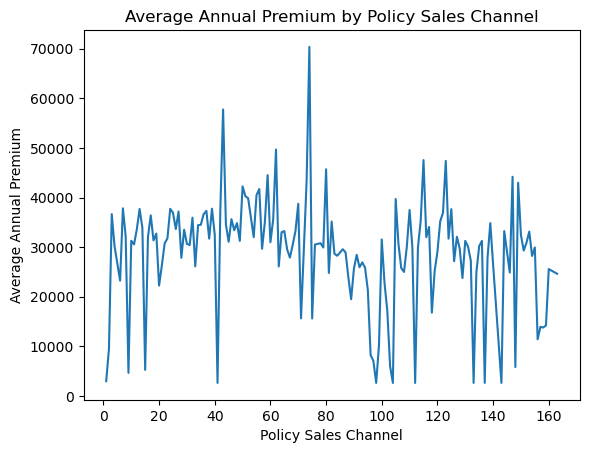

In [45]:
grouped = df.groupby('Policy_Sales_Channel')['Annual_Premium'].mean()
grouped.plot(kind='line')
plt.title('Average Annual Premium by Policy Sales Channel')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Average Annual Premium')
plt.show()

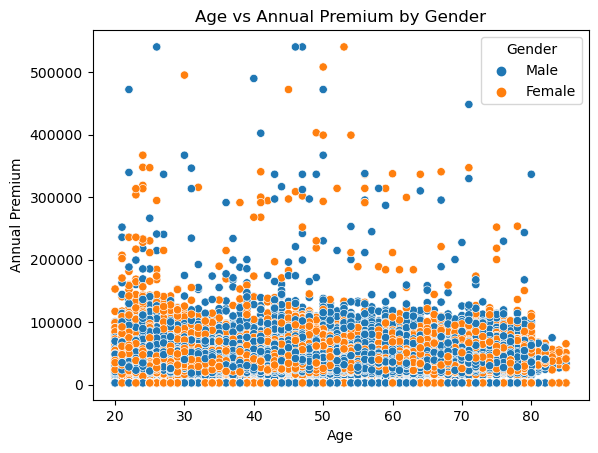

In [46]:
sns.scatterplot(x='Age', y='Annual_Premium', hue='Gender', data=df)
plt.title('Age vs Annual Premium by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()

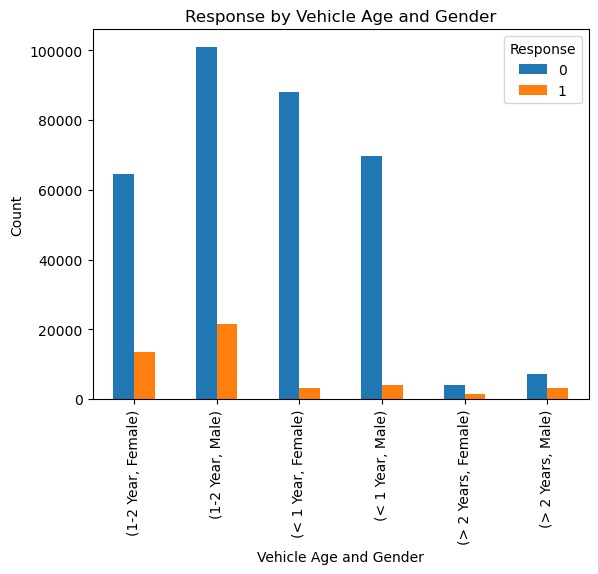

In [47]:
grouped = df.groupby(['Vehicle_Age', 'Gender', 'Response']).size().unstack()
grouped.plot(kind='bar', stacked=False)
plt.title('Response by Vehicle Age and Gender')
plt.xlabel('Vehicle Age and Gender')
plt.ylabel('Count')
plt.show()

# checking for outliers

In [49]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response'],
      dtype='object')

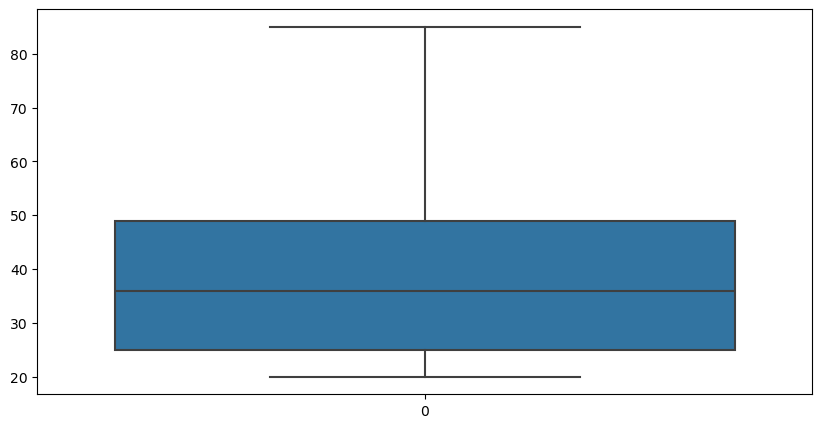

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Age'])
plt.show()

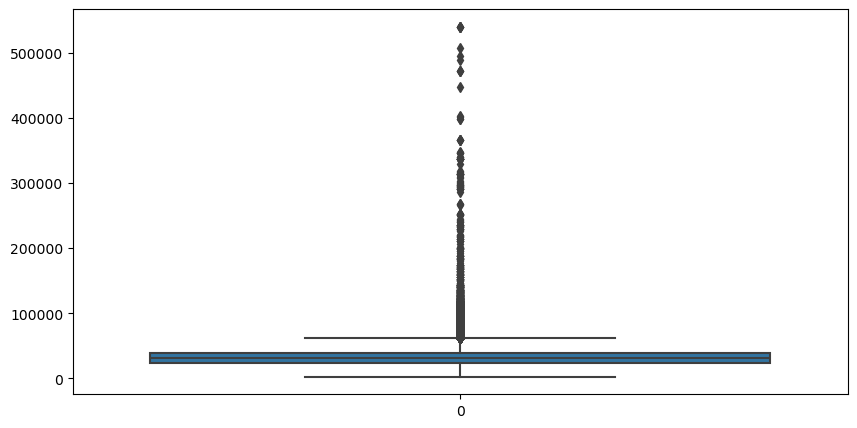

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Annual_Premium'])
plt.show()

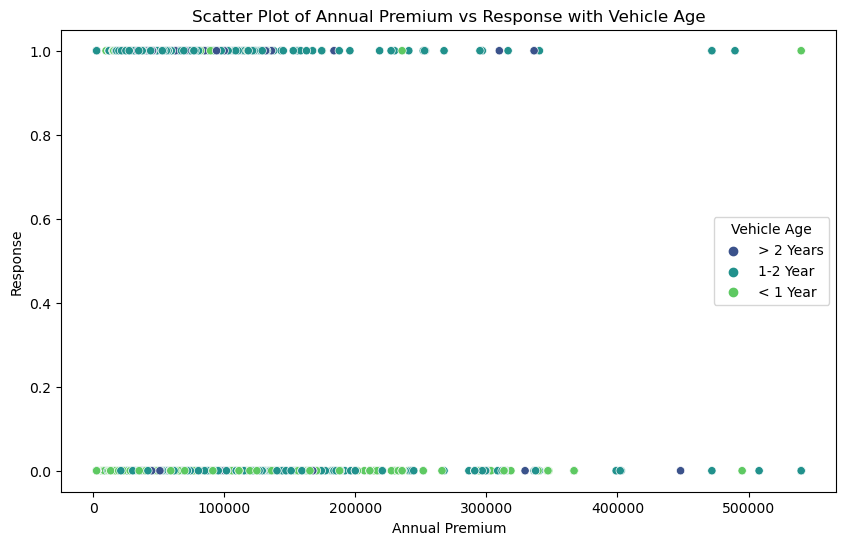

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Premium', y='Response', hue='Vehicle_Age', data=df, palette='viridis')

# Adding titles and labels
plt.title('Scatter Plot of Annual Premium vs Response with Vehicle Age')
plt.xlabel('Annual Premium')
plt.ylabel('Response')
plt.legend(title='Vehicle Age')

# Display the plot
plt.show()

 no need to treat outliers in the anual premium

# Encoding for heatmap

In [55]:
# let map the Vehicle Age with numbers with respect to the data
mapping = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}

In [56]:
df['Vehicle_Age'] = df['Vehicle_Age'].map(mapping)

In [57]:
df.head(3)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,0,2,Yes,40454.0,26.0,217,1
1,Male,76,1,0,1,No,33536.0,26.0,183,0
2,Male,47,1,0,2,Yes,38294.0,26.0,27,1


In [58]:
test['Vehicle_Age'] = test['Vehicle_Age'].map(mapping)

In [59]:
num_col = df.select_dtypes(include='number')

# encoding gender and vehicle_Damage

In [61]:
map = {'Female': 0, 'Male': 1}

In [62]:
df['Gender'] = df['Gender'].map(map)

In [63]:
test['Gender']= test['Gender'].map(map)

In [64]:
# encoding vehicle damage
mapp = {'Yes' : 1, 'No' : 0}

In [65]:
df[	'Vehicle_Damage'] = df[	'Vehicle_Damage'].map(mapp)

In [66]:
test['Vehicle_Damage'] = test['Vehicle_Damage'].map(mapp)

In [67]:
df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,0,2,1,40454.0,26.0,217,1
1,1,76,1,0,1,0,33536.0,26.0,183,0
2,1,47,1,0,2,1,38294.0,26.0,27,1
3,1,21,1,1,0,0,28619.0,152.0,203,0
4,0,29,1,1,0,0,27496.0,152.0,39,0


# HEATMAP

In [69]:
corr = df.corr()

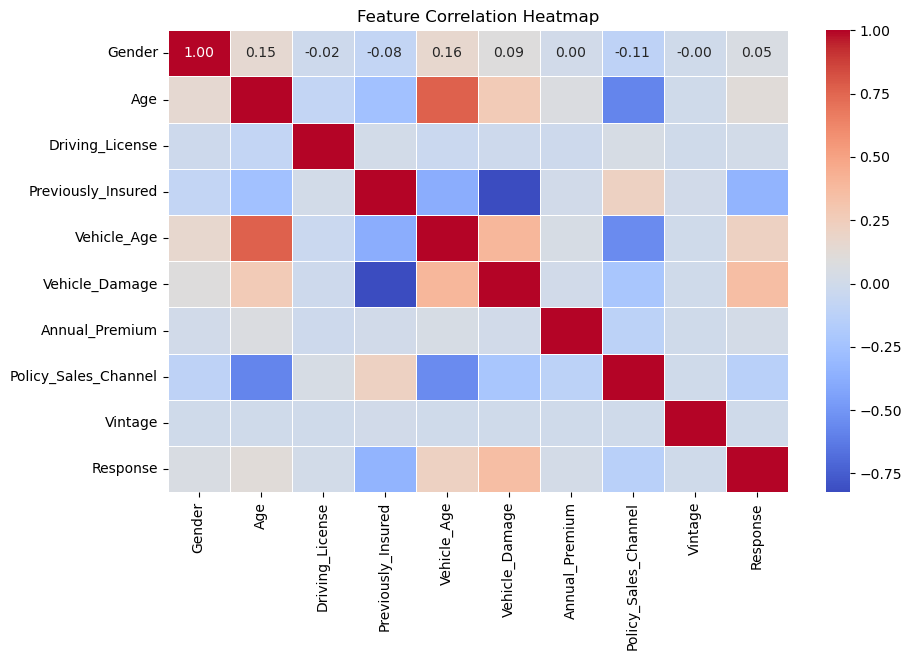

In [70]:
# Plot the heatmap
plt.figure(figsize=(10, 6))  # Adjust size
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

* Gender vs. Age: The correlation is 0.15, indicating a weak positive relationship. This might suggest that gender has a slight influence on age distribution in the dataset.
* 
Gender vs. Response: The correlation is 0.05, indicating almost no relationship. This suggests that gender may not be a significant factor in predicting the response. 

Age vs. Response: If the correlation is positive, it might indicate that older individuals are more likely to respond positivel y.

Vehicle_Damage vs. Response: If the correlation is negative, it might suggest that individuals with vehicle damage are less likely to respond posit

* Driving_License: If Driving_License has a high correlation with Response, it might indicate that having a driving license is a significant factor in the response.
* 
Vehicle_Age: If Vehicle_Age has a high correlation with Annual_Premium, it might suggest that older vehicles are associated with lower premiums.ively.